# Web Mining and Applied NLP (44-620)

## Matplotlib and pyplot

### Student Name: Derek Fintel
**GitHub:** [dfintel25](https://github.com/dfintel25?tab=repositories)

Perform the tasks described in the Markdown cells below.  When you have completed the assignment make sure your code cells have all been run (and have output beneath them) and ensure you have committed and pushed ALL of your changes to your assignment repository.

Every question that requires you to write code will have a code cell underneath it; you may either write your entire solution in that cell or write it in a python file (`.py`), then import and run the appropriate code to answer the question.

Do not use other external modules except `matplotlib` and `pyplot` (e.g. `math`, etc) for this assignment unless you are explicitly instructed to, though you may use built in python functions (`min`, `max`, etc) as you wish.

For all of these questions, your plots must have an appropriate title and labeled axes.  Use the Matplotlib documentation as necessary to guide you through these exercises.

### Step 1

1. Given the text below, create a bar plot (or a horizontal bar plot) that shows the frequency distribution of characters in the string. 
A dictionary has been created for you containing the characters and the frequencies of the characters.
Make sure your bar plot has the bars labelled correctly (with the character it represents the frequency of).


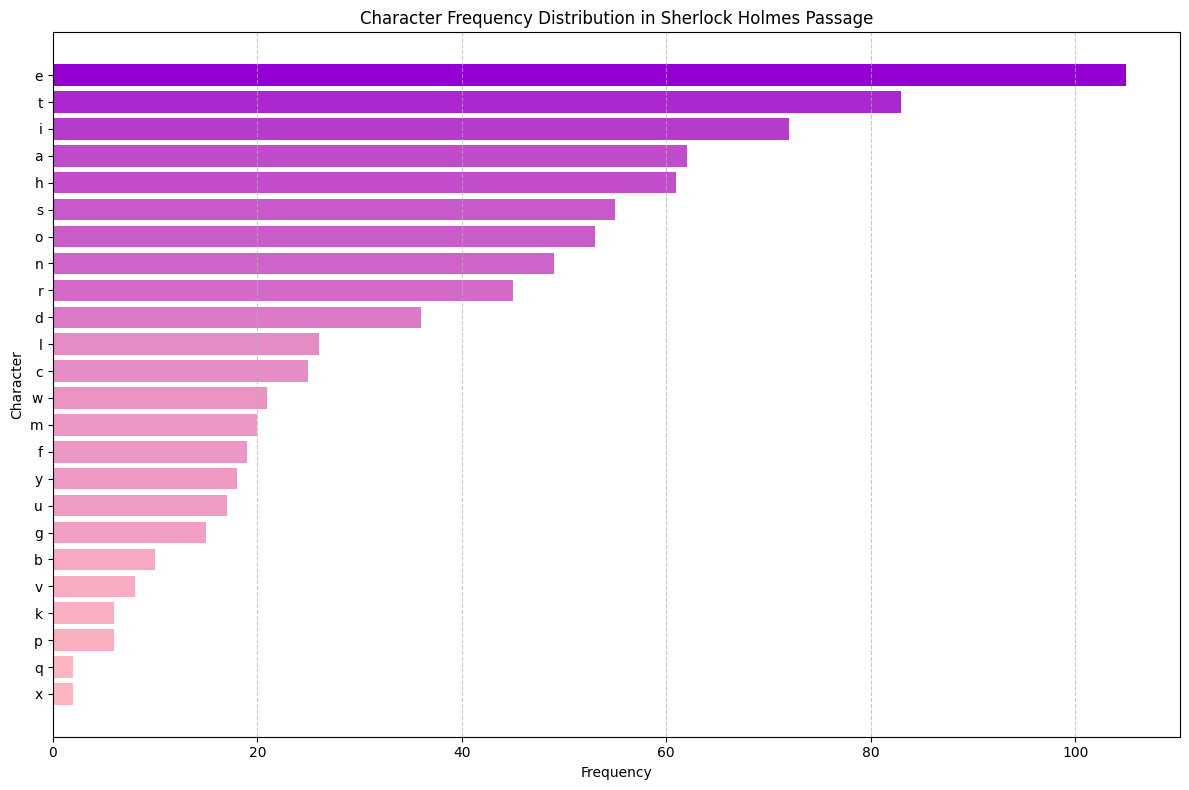

In [ ]:
from collections import Counter
TEXT = "At three o’clock precisely I was at Baker Street, but Holmes had not yet returned. The landlady informed me that he had left the house shortly after eight o’clock in the morning. I sat down beside the fire, however, with the intention of awaiting him, however long he might be. I was already deeply interested in his inquiry, for, though it was surrounded by none of the grim and strange features which were associated with the two crimes which I have already recorded, still, the nature of the case and the exalted station of his client gave it a character of its own. Indeed, apart from the nature of the investigation which my friend had on hand, there was something in his masterly grasp of a situation, and his keen, incisive reasoning, which made it a pleasure to me to study his system of work, and to follow the quick, subtle methods by which he disentangled the most inextricable mysteries. So accustomed was I to his invariable success that the very possibility of his failing had ceased to enter into my head.".lower()
letter_freq = dict(Counter(TEXT))
# make a bar plot with an appropriate title, correct xtick labels, and labeled axes

import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.cm as cm
import matplotlib.colors as mcolors

# Prepare text and calculate frequencies
TEXT = """
At three o’clock precisely I was at Baker Street, but Holmes had not yet returned. 
The landlady informed me that he had left the house shortly after eight o’clock in the morning. 
I sat down beside the fire, however, with the intention of awaiting him, however long he might be. 
I was already deeply interested in his inquiry, for, though it was surrounded by none of the grim and strange 
features which were associated with the two crimes which I have already recorded, still, the nature of the case 
and the exalted station of his client gave it a character of its own. 
Indeed, apart from the nature of the investigation which my friend had on hand, 
there was something in his masterly grasp of a situation, and his keen, incisive reasoning, 
which made it a pleasure to me to study his system of work, 
and to follow the quick, subtle methods by which he disentangled the most inextricable mysteries. 
So accustomed was I to his invariable success that the very possibility of his failing had ceased to enter into my head.
""".lower()

# Count frequencies in dictionary
letter_freq = dict(Counter(TEXT))

# Filter only alphabetic characters 
filtered_freq = {char: freq for char, freq in letter_freq.items() if char.isalpha()}

# Sort dictionary by frequency
sorted_items = sorted(filtered_freq.items(), key=lambda x: x[1], reverse=True)
characters = [item[0] for item in sorted_items]
frequencies = [item[1] for item in sorted_items]

# Customize - Added a gradient colormap 
cmap = mcolors.LinearSegmentedColormap.from_list("pink_purple", ["lightpink", "darkviolet"])
norm = mcolors.Normalize(vmin=min(frequencies), vmax=max(frequencies))
colors = [cmap(norm(freq)) for freq in frequencies]

# Plot Results
plt.figure(figsize=(12, 8))
bars = plt.barh(characters, frequencies, color=colors)
plt.xlabel("Frequency")
plt.ylabel("Character")
plt.title("Character Frequency Distribution in Sherlock Holmes Passage")
plt.gca().invert_yaxis()  # Highest frequency at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


### Step 2

2. Generate a sequence of at least 5 random numbers (integers are fine), and visualize the data using both `scatter` and `plot` on different axes.  You may use the index of the value as its x value in the plot.

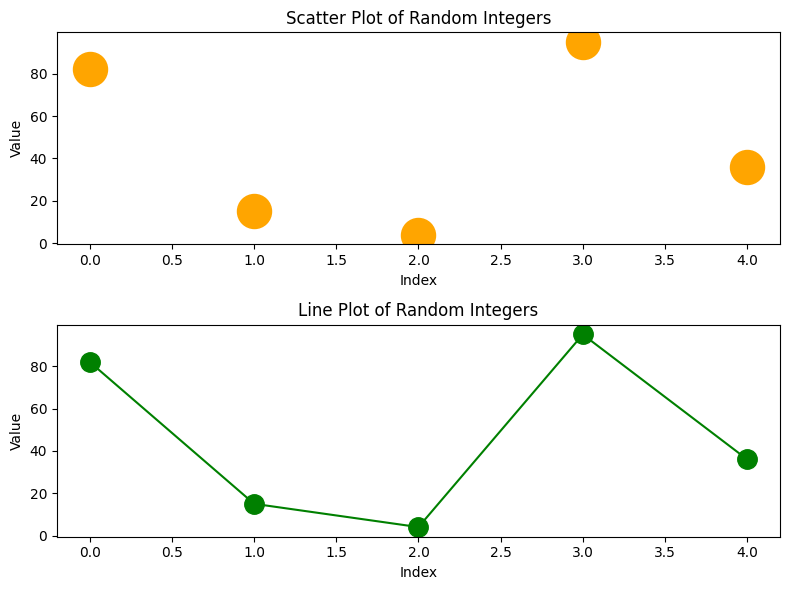

In [129]:
import matplotlib.pyplot as plt
import random

# Generate random data
random.seed(42)  # For reproducibility (optional)
values = [random.randint(1, 100) for _ in range(5)]
indices = list(range(len(values)))

# Create 2 subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 6))

# Scatter plot
ax1.scatter(indices, values, color='orange', s=600)
ax1.set_title("Scatter Plot of Random Integers")
ax1.set_xlabel("Index")
ax1.set_ylabel("Value")

# Line plot
ax2.plot(indices, values, marker='o', linestyle='-', color='green', markersize=14)
ax2.set_title("Line Plot of Random Integers")
ax2.set_xlabel("Index")
ax2.set_ylabel("Value")

# Final layout
plt.tight_layout()
plt.show()


### Step 3

3. Do the same question as above, but change the syle and color of both the scatter and the plot.

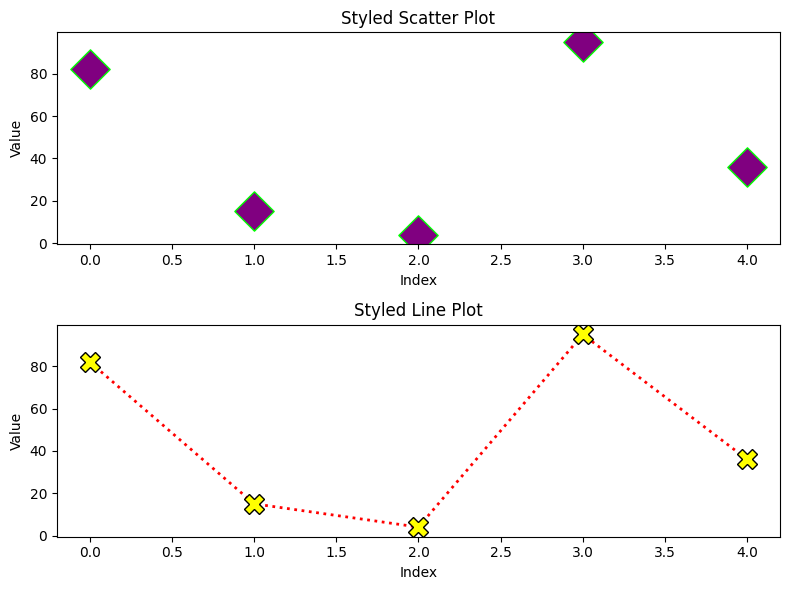

In [130]:
import matplotlib.pyplot as plt
import random

# Generate random data
random.seed(42)
values = [random.randint(1, 100) for _ in range(5)]
indices = list(range(len(values)))

# Create subplots
fig, axes = plt.subplots(2, 1, figsize=(8, 6))

# Change Scatter Plot
axes[0].scatter(
    indices, values,
    color='purple',
    s=400,
    marker='D',  # Diamond shape
    edgecolor='lime' # Lime border
)
axes[0].set_title("Styled Scatter Plot")
axes[0].set_xlabel("Index")
axes[0].set_ylabel("Value")

# Change Line Plot
axes[1].plot(
    indices, values,
    color='red',
    marker='X',       # "X" marker
    linestyle='dotted',   # Dotted line
    linewidth=2,
    markersize=14,
    markerfacecolor='yellow',
    markeredgecolor='black'
)
axes[1].set_title("Styled Line Plot")
axes[1].set_xlabel("Index")
axes[1].set_ylabel("Value")

# Show Plot
plt.tight_layout()
plt.show()


### Step 4

4. Given the data sets below, plot or scatter both on the same set of axes.  You are plotting the time it takes to execute a sorting algorithm on a list of a given size; your x axis should be the size, and the y axis is time.  Assume that `insertion_sort_times[i]` is how long it took to sort a list of length `sizes[i]`.  Add a legend to your plot showing which is insertion sort and which is merge sort.  Use the variable names to determine which data is which. 

In [131]:
sizes = [10, 20, 50, 100, 1000, 5000]
insertion_sort_times = [0.0010252999999999998, 0.0027026999999999954, 0.010147200000000002, 0.0381137, 3.6303399, 91.2180796]
merge_sort_times = [0.00161889999999687, 0.003635600000009731, 0.0090655000000055, 0.020108000000007564, 0.2687474000000094, 1.6147050999999948]

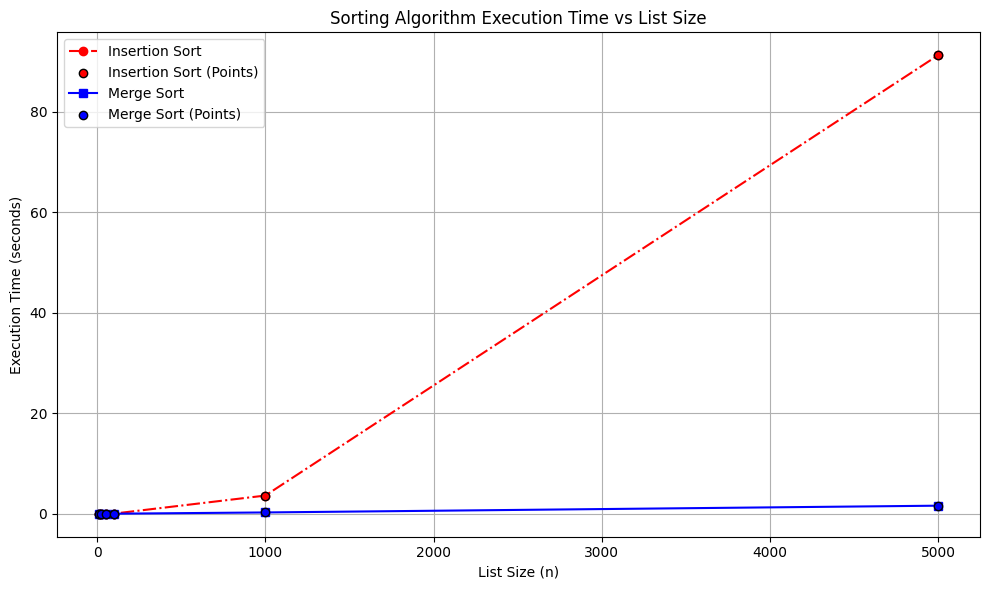

In [132]:
import matplotlib.pyplot as plt

# Base data
sizes = [10, 20, 50, 100, 1000, 5000]
insertion_sort_times = [0.0010253, 0.0027027, 0.0101472, 0.0381137, 3.6303399, 91.2180796]
merge_sort_times = [0.0016189, 0.0036356, 0.0090655, 0.020108, 0.2687474, 1.6147051]

# Create plot
plt.figure(figsize=(10, 6))

# Plot Insertion Sort
plt.plot(sizes, insertion_sort_times, marker='o', color='red', label='Insertion Sort', linestyle='dashdot')
plt.scatter(sizes, insertion_sort_times, color='red', edgecolor='black', label='Insertion Sort (Points)', zorder=5)


# Plot Merge Sort
plt.plot(sizes, merge_sort_times, marker='s', color='blue', label='Merge Sort', linestyle='-')
plt.scatter(sizes, merge_sort_times, color='blue', edgecolor='black', label='Merge Sort (Points)', zorder=5)


# Plot labels and title
plt.xlabel("List Size (n)")
plt.ylabel("Execution Time (seconds)")
plt.title("Sorting Algorithm Execution Time vs List Size")

# Plot Legend
plt.legend()

# Plot grid
plt.grid(True)

# Show plot
plt.tight_layout()
plt.show()
